In [1]:
from google.colab import drive
import pandas as pd

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 파일 경로 설정

file_path = '/content/drive/MyDrive/전처리 결과 신흥반점_전처리(P2C).csv'

df = pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
# 필요한 열만 선택하여 데이터프레임 생성
selected_columns = ['닉네임', 'review_spell_check', 'label']
df_selected = df[selected_columns]

# 결과 출력
print(df_selected)

      닉네임                                 review_spell_check  label
0    cg**                                       너무 맛나게 먹었습니다    1.0
1    de**                           양도 많고 맛있습니다 자주 주문할 것 같아요    1.0
2    to**                              오랜만에 보는 옛날 탕수육이라 좋았어요    1.0
3    le**           탕볶밥에 군만두 너무너무 맛있었어요 탕수육 볶음밥 군만두까지 다 맛있었던    1.0
4    go**               전날 술 먹고 어질한데 먹고 살아났습니다 얼큰하고 시원해서 좋네요    1.0
..    ...                                                ...    ...
849  nw**            중국집에서 양파춘 장 없이 딸랑 단무지만 비닐봉지에 받아보기는 첨입니다    0.0
850  a2**                    배달 진심 너무 느렸어요 배달은 별 0개 드리고 싶어요     0.0
851  c_**  바쁘셔서 예상 배달 시간보다 10분 정도 더 기다렸는데전체적으로 맛있어요하지만 공깃...    0.0
852  sd**              제육에서 불향이 아니라 그을린 냄새가 너무 나서전화하려다 말았습니다    0.0
853  sd**  짜장이 많이 짜던데 따로 많이 주시는 거 보니알아서 간 조절 해 먹는 스타일 같아요...    0.0

[854 rows x 3 columns]


In [3]:
# 필요한 시스템 패키지 설치
!apt-get update -y
!apt-get install -y fonts-unfonts-core fontconfig libkrx libicu-dev libopenblas-base libhdf5-dev
!pip install konlpy

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [60.9 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,545 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,627 k

In [4]:
from konlpy.tag import Okt
import pandas as pd
import numpy as np

# 설치된 라이브러리 로드
okt = Okt()

# 직접 설정한 불용어 리스트
custom_stop_words = ['단어', '중국집', '성남', '서비스', '리뷰', '이벤트', '소스', '단무지', '춘장', '시간', '쿠폰', '번창', '사진', '진짜', '여기', '식구', '그냥', '올해', '예상', '역시', '항상', '매번',
                    '계속', '정함', '수정', '아주', '혼자', '다음', '거의', '후기', '무슨', '중간', '안산', '나름', '아저씨', '다시', '수고', '만약', '오늘', '살짝', '번창', '예정', '분도', '다른', '런가', '이라', '요']

# 명사와 용언 어간만 추출하고 불용어 제거
# 명사(Noun), 용언(Verb), 형용사(Adjective) 포함
def extract_nouns_verbs_and_remove_stopwords(text):
    if isinstance(text, str):
        # 어간 추출을 포함하여 품사 태깅
        pos_tags = okt.pos(text, stem=True)
        # 명사(Noun), 용언(Verb), 형용사(Adjective) 필터링 및 불용어 제거
        filtered_nouns_verbs_adj = [word for word, pos in pos_tags if pos in ['Noun', 'Verb', 'Adjective'] and word not in custom_stop_words]
        return filtered_nouns_verbs_adj
    return []


# 필요한 열만 선택하여 데이터프레임 생성
selected_columns = ['닉네임', 'review_spell_check', 'label']
df_selected = df[selected_columns]

# review_spell_check 열에서 명사와 용언만 추출하고 불용어 제거하여 단어 단위 리스트로 변환
df_selected['filtered_nouns_verbs'] = df_selected['review_spell_check'].apply(extract_nouns_verbs_and_remove_stopwords)

# 결과 출력
print(df_selected)

      닉네임                                 review_spell_check  label  \
0    cg**                                       너무 맛나게 먹었습니다    1.0   
1    de**                           양도 많고 맛있습니다 자주 주문할 것 같아요    1.0   
2    to**                              오랜만에 보는 옛날 탕수육이라 좋았어요    1.0   
3    le**           탕볶밥에 군만두 너무너무 맛있었어요 탕수육 볶음밥 군만두까지 다 맛있었던    1.0   
4    go**               전날 술 먹고 어질한데 먹고 살아났습니다 얼큰하고 시원해서 좋네요    1.0   
..    ...                                                ...    ...   
849  nw**            중국집에서 양파춘 장 없이 딸랑 단무지만 비닐봉지에 받아보기는 첨입니다    0.0   
850  a2**                    배달 진심 너무 느렸어요 배달은 별 0개 드리고 싶어요     0.0   
851  c_**  바쁘셔서 예상 배달 시간보다 10분 정도 더 기다렸는데전체적으로 맛있어요하지만 공깃...    0.0   
852  sd**              제육에서 불향이 아니라 그을린 냄새가 너무 나서전화하려다 말았습니다    0.0   
853  sd**  짜장이 많이 짜던데 따로 많이 주시는 거 보니알아서 간 조절 해 먹는 스타일 같아요...    0.0   

                                  filtered_nouns_verbs  
0                                          [맛, 나다, 먹다]  
1                     [양도, 많다, 맛있

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from scipy.sparse import csr_matrix

In [7]:
# 'tokens' 열을 공백으로 연결하여 벡터화 가능하도록 함
X = df_selected['filtered_nouns_verbs'].apply(' '.join)  # 텍스트를 공백으로 연결하여 벡터화 가능하도록 함
y = df_selected['label']

# CountVectorizer를 사용하여 텍스트 벡터화
vectorizer = CountVectorizer(max_features=None)  # max_features=None로 설정하여 모든 단어 사용
X_vect = vectorizer.fit_transform(X)

# 훈련-테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 생성
model = LogisticRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측 확률 계산
y_prob = model.predict_proba(X_test)[:, 1]  # 클래스 1의 확률값

# 임계치 적용 (0.6 이상은 1, 미만은 0)
threshold = 0.6
y_pred = (y_prob >= threshold).astype(int)  # 확률값을 기준으로 이진 값으로 변환

# 테스트 데이터에 해당하는 review_spell_check 추출
X_test_indices = y_test.index  # 테스트 데이터의 인덱스
review_spell_check_test = df_selected.loc[X_test_indices, 'review_spell_check']

# 결과를 데이터프레임으로 저장
results_df = pd.DataFrame({
    'review_spell_check': review_spell_check_test.values,  # 원본 리뷰 텍스트
    '실제 Label': y_test.values,
    '결정계수 (확률값)': y_prob,
    '예측된 Label': y_pred  # 임계치를 적용한 이진 클래스 예측
})

# 결과 출력
print("결과 데이터프레임:")
print(results_df)



결과 데이터프레임:
                                    review_spell_check  실제 Label  결정계수 (확률값)  \
0                                                 맛있어요       1.0    0.938068   
1                            개 맛있네요 유산슬밥 이런건지멀랏는데 놀랍네요       1.0    0.938564   
2                                          맛있게 잘 먹었습니다       1.0    0.965687   
3                   배달도 빠르고 요청 사항도 잘 들어주시고 맛있게 잘 먹었습니다       1.0    0.959356   
4    대구랑은 좀 다르지만 약간 고기덮밥 느낌이고 고기 많고 맛있어요 담에 좀 더 맵게 ...       0.0    0.556749   
..                                                 ...       ...         ...   
252                            호홋 군만두 오호  센스  싸장님  요호홋       1.0    0.861481   
253                           맛있어요 탕수육 소스가 더 있었으면 좋겠어요       1.0    0.943265   
254                              출출한 새벽 배달할 수 있어서  좋네요       1.0    0.857574   
255                         조금씩 돌아오는 듯 합니다 배부르게 잘 먹었어요       1.0    0.878263   
256                                          맛있게 먹었습니다       1.0    0.933391   

     예측된 Label  
0          

In [14]:
# 전체 데이터를 테스트 데이터로 설정
X_full = df_selected['filtered_nouns_verbs'].apply(' '.join)  # 'tokens' 열을 공백으로 연결
X_full_vect = vectorizer.transform(X_full)  # 학습된 벡터라이저로 변환

# 전체 데이터를 기반으로 확률값 계산
y_full_proba = model.predict_proba(X_full_vect)[:, 1]  # 클래스 1의 확률값만 선택
y_full_pred = (y_full_proba >= 0.6).astype(int)  # 임계치 0.6을 적용하여 예측된 label 값

# 전체 데이터에 해당하는 review_spell_check 열 가져오기
review_spell_check_full = df_selected['review_spell_check']

# 예측된 전체 label에서 1의 비율 계산
rate_of_ones = (y_full_pred.mean())

# 결과를 데이터프레임으로 저장
full_results_df = pd.DataFrame({
    'review_spell_check': review_spell_check_full,  # 원본 리뷰 텍스트
    '실제 Label': df_selected['label'],             # 실제 레이블                  # 예측된 클래스 1의 확률값 (0~1 사이의 값)
    '예측된 Label': y_full_pred,                    # 임계치를 적용한 예측된 label 값
                      # 예측된 전체 label에서 1의 비율
})

# 결과 출력
print("전체 데이터에 대한 예측 확률 및 label 결과:")
print(full_results_df)
print(f"\n예측된 확률값의 평균: {rate_of_ones:.4f}")



전체 데이터에 대한 예측 확률 및 label 결과:
                                    review_spell_check  실제 Label  예측된 Label
0                                         너무 맛나게 먹었습니다       1.0          1
1                             양도 많고 맛있습니다 자주 주문할 것 같아요       1.0          1
2                                오랜만에 보는 옛날 탕수육이라 좋았어요       1.0          1
3             탕볶밥에 군만두 너무너무 맛있었어요 탕수육 볶음밥 군만두까지 다 맛있었던       1.0          1
4                 전날 술 먹고 어질한데 먹고 살아났습니다 얼큰하고 시원해서 좋네요       1.0          1
..                                                 ...       ...        ...
849            중국집에서 양파춘 장 없이 딸랑 단무지만 비닐봉지에 받아보기는 첨입니다       0.0          0
850                    배달 진심 너무 느렸어요 배달은 별 0개 드리고 싶어요        0.0          0
851  바쁘셔서 예상 배달 시간보다 10분 정도 더 기다렸는데전체적으로 맛있어요하지만 공깃...       0.0          0
852              제육에서 불향이 아니라 그을린 냄새가 너무 나서전화하려다 말았습니다       0.0          0
853  짜장이 많이 짜던데 따로 많이 주시는 거 보니알아서 간 조절 해 먹는 스타일 같아요...       0.0          0

[854 rows x 3 columns]

예측된 확률값의 평균: 0.7447


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

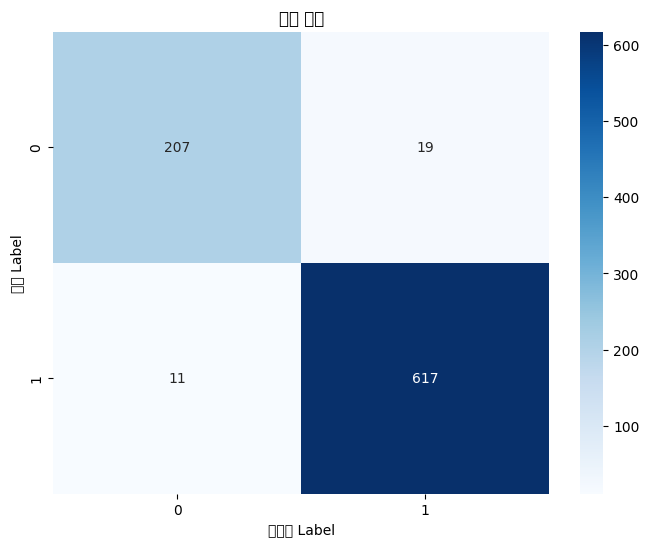

In [15]:
# 실제 label 값과 예측 label 값으로 혼동 행렬 계산
conf_matrix = confusion_matrix(df_selected['label'], y_full_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('예측된 Label')
plt.ylabel('실제 Label')
plt.title('혼동 행렬')
plt.show()

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 가정된 데이터 프레임 (수정된 df1 예시)
# df1 = pd.DataFrame({'본문': [...], '개인 리뷰 별점_평균': [...]})

# 별점을 이진화: 1~3은 부정, 4~5는 긍정으로 설정
df1['별점'] = df1['개인 리뷰 별점_평균'].apply(lambda x: 0 if x <= 4 else 1)

# 본문 열과 별점 열만 가져오기
df1_filtered = df1[['본문', '별점']].dropna()  # 결측값 제거

# 본문 데이터를 단어 단위로 나누기
df1_filtered['tokens'] = df1_filtered['본문'].apply(lambda x: x.split() if isinstance(x, str) else [])

# 벡터화: CountVectorizer 사용
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df1_filtered['tokens'].apply(' '.join))

# 별점 데이터를 이진화
y = df1_filtered['별점']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델
model = LogisticRegression()

# 모델 학습
model.fit(X_train, y_train)

# 모델 입력 및 예측
def predict_review(vectorizer, model):
    while True:
        # 사용자 입력
        review = input("리뷰를 입력하세요 (종료하려면 '종료'를 입력하세요): ")
        if review.lower() == '종료':
            break

        # 별점 입력
        try:
            rating = int(input("별점을 입력하세요 (1-5 사이): "))
            if rating < 1 or rating > 5:
                print("별점은 1에서 5 사이여야 합니다.")
                continue
        except ValueError:
            print("잘못된 입력입니다. 별점은 숫자로 입력하세요.")
            continue

        # 별점 이진화
        y_input = 0 if rating <= 4 else 1

        # 리뷰를 텍스트로 벡터화
        tokens = review.split()
        X_input = vectorizer.transform([' '.join(tokens)])

        # 예측
        prediction = model.predict(X_input)[0]

        # 결과 출력
        print(f"입력한 리뷰: {review}")
        print(f"예측된 별점: {'긍정' if prediction == 1 else '부정'}")

# 모델을 계속 업데이트하고 싶다면 모델 학습 후 추가 학습 과정도 포함시킬 수 있습니다.
predict_review(vectorizer, model)


입력한 리뷰: 탕수육이 너무 셔요
예측된 별점: 긍정
